In [1]:
# Import pandas 
import pandas as pd

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [3]:
# Print info on white wine
print(white.info())

# Print info on red wine
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null fl

In [94]:
# First rows of `red` 
red.head(5)

# Last rows of `white`
white.tail()

# # Take a sample of 5 rows of `red`
red.sample(5)

# # Describe `white`
white.describe()

# # Double check for null values in `red`
# pd.isnull(red)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.0
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.0
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.0
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,0.0
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,0.0
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,0.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,0.0


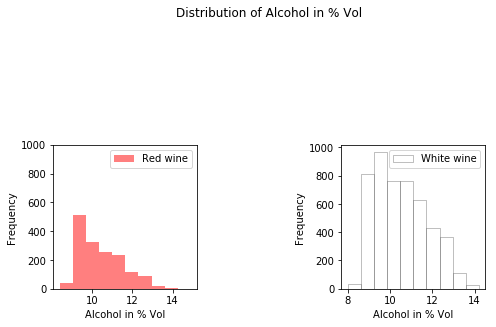

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")
plt.show()

In [20]:
import numpy as np
print(np.histogram(red.alcohol, bins=[7,8,9,10,11,12,13,14,15]))
print(np.histogram(white.alcohol, bins=[7,8,9,10,11,12,13,14,15]))

(array([  0,   7, 673, 452, 305, 133,  21,   8]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))
(array([   0,  317, 1606, 1256,  906,  675,  131,    7]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))


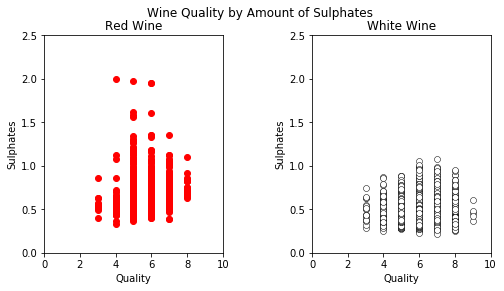

In [23]:
#sulphate vs quality of wine
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

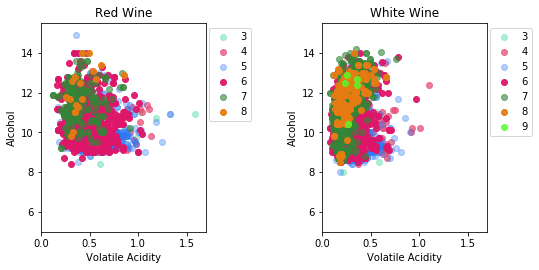

In [37]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

In [40]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)


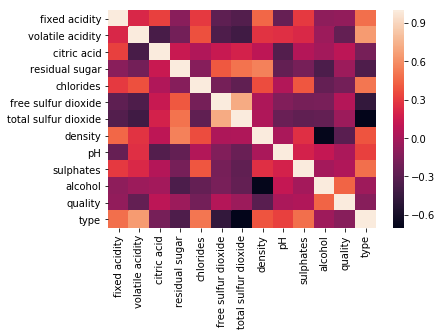

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [52]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=wines.ix[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [69]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))



In [67]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# # Model config
model.get_config()

# # List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12)                144       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


[array([[-0.15335792, -0.04764646, -0.12356523, -0.07403594, -0.26548889,
          0.01632428,  0.15709829, -0.28019252, -0.09384832,  0.39197534,
         -0.23419207,  0.48965222],
        [ 0.12054586, -0.44437924, -0.0664016 , -0.38137475, -0.39792848,
         -0.46418992,  0.25976992, -0.20623636, -0.2568447 , -0.22813141,
          0.29296494,  0.2565316 ],
        [-0.32364887, -0.2702221 ,  0.23922849, -0.22831458,  0.08764857,
          0.30255872,  0.28598577,  0.3713935 , -0.32493579,  0.11672854,
          0.23133284, -0.2093333 ],
        [ 0.22430533,  0.49069673,  0.27613932,  0.24729401,  0.44357514,
         -0.16487244, -0.01835561,  0.15444303, -0.000916  ,  0.12993968,
          0.48855323, -0.49913359],
        [ 0.45799285, -0.04355428,  0.5038411 ,  0.45022255, -0.4953126 ,
         -0.12181535, -0.02816737,  0.16002381,  0.16471422, -0.45396462,
         -0.11850995,  0.22744852],
        [-0.15791553, -0.17603111,  0.3394894 , -0.49398696, -0.00512278,
      

In [70]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.1748 - acc: 0.9419
Epoch 2/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0460 - acc: 0.9945
Epoch 3/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0225 - acc: 0.9963
Epoch 4/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0198 - acc: 0.9970
Epoch 5/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0180 - acc: 0.9966
Epoch 6/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0169 - acc: 0.9972
Epoch 7/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0156 - acc: 0.9970
Epoch 8/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0145 - acc: 0.9975
Epoch 9/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0140 - acc: 0.9970
Epoch 10/20
4352/4352 [==============================] - 11s 3ms/step - loss: 0.0132 - acc: 0.9975
Epoch 11/20
4352/4352 [=

In [74]:
y_pred = model.predict(X_test)

In [76]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

2145/2145 [==============================] - 0s 44us/step
[0.023558409481027744, 0.99487179487179489]


In [82]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
# Confusion matrix
confusion_matrix(y_test, y_pred.round())

array([[1586,    2],
       [   9,  548]])

In [85]:
precision_score(y_test, y_pred.round())

0.99636363636363634

In [88]:
recall_score(y_test, y_pred.round())

0.98384201077199285

In [91]:
f1_score(y_test,y_pred.round())

0.99006323396567297

In [96]:
cohen_kappa_score(y_test, y_pred.round())

0.98660756095276747

In [ ]:
#Experiment further continued

In [99]:
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(64, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

# Model output shape
print model.output_shape

# Model summary
print model.summary()

# # # Model config
# model.get_config()

# # # List all weight tensors 
# model.get_weights()



(None, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
_________________________________________________________________
None


In [100]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

y_pred = model.predict(X_test)

score = model.evaluate(X_test, y_test,verbose=1)

print(score)

Epoch 1/20
4352/4352 [==============================] - 11s 2ms/step - loss: 0.0535 - acc: 0.9876
Epoch 2/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0219 - acc: 0.9963
Epoch 3/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0189 - acc: 0.9972
Epoch 4/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0171 - acc: 0.9963
Epoch 5/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0144 - acc: 0.9972
Epoch 6/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0131 - acc: 0.9975
Epoch 7/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0119 - acc: 0.9972
Epoch 8/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0108 - acc: 0.9979
Epoch 9/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0098 - acc: 0.9982
Epoch 10/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0110 - acc: 0.9968
Epoch 11/20
4352/43

In [103]:
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(128, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(64, activation='relu'))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

# Model output shape
print model.output_shape

# Model summary
print model.summary()

# # # Model config
# model.get_config()

# # # List all weight tensors 
# model.get_weights()



(None, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               1536      
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 9         
Total params: 10,321
Trainable params: 10,321
Non-trainable params: 0
_________________________________________________________________
None


In [106]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=10, batch_size=1, verbose=1)

y_pred = model.predict(X_test)

score = model.evaluate(X_test, y_test,verbose=1)

print(score)



Epoch 1/10
4352/4352 [==============================] - 12s 3ms/step - loss: 0.0158 - acc: 0.9979
Epoch 2/10
4352/4352 [==============================] - 11s 3ms/step - loss: 0.0101 - acc: 0.9986
Epoch 3/10
4352/4352 [==============================] - 13s 3ms/step - loss: 0.0231 - acc: 0.9970
Epoch 4/10
4352/4352 [==============================] - 14s 3ms/step - loss: 0.0134 - acc: 0.9977
Epoch 5/10
4352/4352 [==============================] - 11s 3ms/step - loss: 0.0081 - acc: 0.9986
Epoch 6/10
4352/4352 [==============================] - 12s 3ms/step - loss: 0.0061 - acc: 0.9993
Epoch 7/10
4352/4352 [==============================] - 11s 3ms/step - loss: 0.0151 - acc: 0.9977
Epoch 8/10
4352/4352 [==============================] - 14s 3ms/step - loss: 0.0089 - acc: 0.9991
Epoch 9/10
4352/4352 [==============================] - 13s 3ms/step - loss: 0.0112 - acc: 0.9977
Epoch 10/10
2145/2145 [==============================] - 0s 107us/step
[0.057642429983208024, 0.99347319347319352]


In [108]:
print precision_score(y_test, y_pred.round())
print recall_score(y_test, y_pred.round())
print f1_score(y_test,y_pred.round())
print cohen_kappa_score(y_test, y_pred.round())

0.987432675045
0.987432675045
0.987432675045
0.983024614591
